# 1. Introduction

Latar Belakang:
Membuat model prediksi churn pelanggan yang bertujuan membantu kita dalam mengidentifikasi pelanggan yang berpotensi berhenti menggunakan layanan mereka. Secara tradisional, penilaian churn sering kali dilakukan secara manual atau berdasarkan intuisi, yang bisa kurang akurat dan memakan waktu. Dengan memanfaatkan model machine learning ini, kita dapat memprediksi churn secara lebih objektif dan efisien, sehingga dapat mengambil tindakan pencegahan tepat waktu untuk mempertahankan pelanggan. Model ini juga membantu meningkatkan akurasi prediksi dan memungkinkan kita untuk mengelola risiko kehilangan pelanggan dengan lebih baik. Tujuan utama dari proyek ini adalah untuk menciptakan proses prediksi churn yang cepat, tepat, dan dapat diandalkan, demi menjaga loyalitas pelanggan dan meningkatkan kinerja bisnis secara keseluruhan.

# 2. Import Libraries

In [33]:
# utk load, eksplorasi dan visualisasi data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# utk split data & evaluasi model
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

# utk feature engineering & preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.pipeline import Pipeline

# utk statistik & deteksi multikolinearitas
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# utk model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# utk penanganan data tidak seimbang
from imblearn.over_sampling import SMOTE

# utk evaluasi performa model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# utk simpan model
import pickle
import joblib

# utk menghilangkan peringatan warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import filterwarnings
filterwarnings('ignore')

# 3. Data Loading
## Import data

In [2]:
# memuat dataset ke dalam variabel data
data = pd.read_csv('ecom_data.csv')

In [3]:
# membuat salinan data asli untuk mencegah perubahan langsung pada dataset utama
df = data.copy()

## Menampilkan informasi dataset

In [38]:
# menampilkan 10 baris pertama dari dataset
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Mobile Phone,1,12.0,CC,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Mobile Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Mobile Phone,1,6.0,CC,Male,3.0,3,Mobile Phone,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Mobile Phone,3,9.0,E wallet,Male,NaN,4,Mobile Phone,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Mobile Phone,1,31.0,Debit Card,Male,2.0,5,Mobile Phone,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [5]:
# menampilkan 10 baris terakhir dari dataset
df.tail(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,55621,0,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,163
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,234
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [6]:
# menampilkan summary informasi terkait dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Berdasarkan informasi di atas, dataset ini terdiri dari 5630 baris dan 20 kolom. Terdapat tiga jenis tipe data dalam dataset ini, yaitu numerik kontinu (float64) sebanyak 7 kolom, numerik diskret (int64) sebanyak 8 kolom, dan kategorikal (object) sebanyak 5 kolom. Beberapa kolom memiliki missing value yaitu kolom ```Tenure```, ```WarehouseToHome```, ```HourSpendOnApp```, ```OrderAmountHikeFromlastYear```, ```CouponUsed```, ```OrderCount```, dan ```DaySinceLastOrder```

**deskripsi di dapat dari kaggle sumber dataset**
| Kolom                        | Deskripsi                                                                 |
|-----------------------------|---------------------------------------------------------------------------|
| CustomerID                  | ID unik untuk setiap pelanggan                                            |
| Churn                       | Flag churn (1 = churn, 0 = tidak churn)                                   |
| Tenure                      | Lama waktu pelanggan menggunakan layanan                                  |
| PreferredLoginDevice        | Perangkat yang biasa digunakan pelanggan untuk login                      |
| CityTier                    | Tier kota tempat tinggal pelanggan                                        |
| WarehouseToHome             | Jarak antara gudang dan rumah pelanggan                                   |
| PreferredPaymentMode        | Metode pembayaran yang disukai pelanggan                                  |
| Gender                      | Jenis kelamin pelanggan                                                   |
| HourSpendOnApp              | Rata-rata jam penggunaan aplikasi atau website per hari                   |
| NumberOfDeviceRegistered    | Jumlah perangkat yang terdaftar atas nama pelanggan                       |
| PreferedOrderCat            | Kategori pesanan yang paling sering dipesan dalam sebulan terakhir        |
| SatisfactionScore           | Skor kepuasan pelanggan terhadap layanan                                  |
| MaritalStatus               | Status pernikahan pelanggan                                               |
| NumberOfAddress             | Jumlah alamat yang ditambahkan oleh pelanggan                             |
| Complain                    | Apakah pelanggan mengajukan komplain dalam sebulan terakhir (1/0)         |
| OrderAmountHikeFromlastYear | Persentase kenaikan jumlah pemesanan dibanding tahun sebelumnya           |
| CouponUsed                  | Jumlah kupon yang digunakan dalam sebulan terakhir                        |
| OrderCount                  | Jumlah total pesanan dalam sebulan terakhir                               |
| DaySinceLastOrder           | Jumlah hari sejak terakhir kali pelanggan melakukan pesanan               |
| CashbackAmount              | Rata-rata cashback yang diterima pelanggan dalam sebulan terakhir         |

In [7]:
# cek missing value pada dataset
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [8]:
# Mengecek apakah missing value pada kolom 'Tenure' merupakan hasil kesalahan input berupa nilai 0

# Ambil indeks baris dengan nilai NaN pada kolom Tenure
a = df.loc[df['Tenure'].isnull()].index
# Lihat distribusi nilai Churn pada baris-baris tersebut
print(df['Churn'].loc[a].value_counts())

# Ambil indeks baris dengan nilai Tenure = 0
b = df.loc[df['Tenure'] == 0.].index
# Lihat distribusi nilai Churn pada baris-baris tersebut
print(df['Churn'].loc[b].value_counts())

Churn
0    183
1     81
Name: count, dtype: int64
Churn
1    272
0    236
Name: count, dtype: int64


```
Kesimpulan di atas adalah tidak ditemukan pola yang menunjukkan bahwa missing value pada kolom 'Tenure' berasal dari kesalahan input berupa nilai 0.
Hal ini didasarkan pada distribusi kelas 'Churn' pada nilai Tenure = 0 yang terlihat cukup merata.
Oleh karena itu nilai 0 pada kolom 'Tenure' diasumsikan valid dan tidak berkaitan langsung dengan nilai 'Churn'.
Penanganan missing value pada kolom 'Tenure' tidak akan dilakukan di tahap data loading,
melainkan akan dipertimbangkan pada tahap preprocessing selanjutnya.
```

In [9]:
# cek ada data duplikat atau tidak
df.duplicated().sum()

np.int64(0)

Terlihat dari informasi di atas bahwa tidak terdapat baris yang duplikat sehingga data aman untuk dianallisis lebih lanjut.

# 4. Exploratory Data Analysis (EDA)

## 4.1 Distribusi jumlah pengguna berdasarkan tipe perangkat login

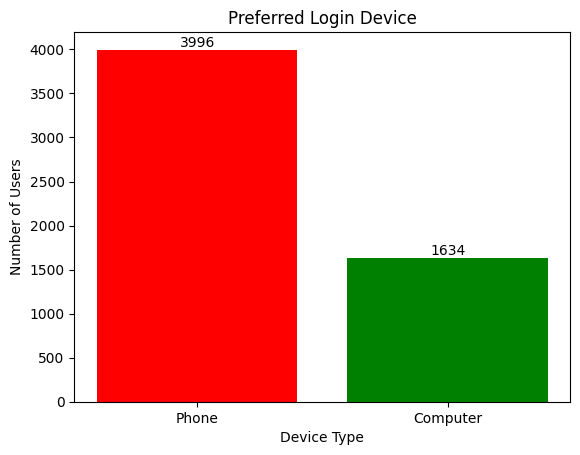

In [10]:
count_phone_users = df['PreferredLoginDevice'].loc[
    (df['PreferredLoginDevice'] == 'Mobile Phone') | (df['PreferredLoginDevice'] == 'Phone')
].count()
count_computer_users = df['PreferredLoginDevice'].loc[df['PreferredLoginDevice'] == 'Computer'].count()

# Buat bar chart preferensi perangkat yang digunakan
plt.bar(['Phone', 'Computer'], [count_phone_users, count_computer_users], color=['red', 'green'])
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.title('Preferred Login Device')
for i, v in enumerate([count_phone_users, count_computer_users]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

Berdasarkan hasil visualisasi bar chart di atas menunjukkan bahwa mayoritas user lebih memilih untuk login menggunakan perangkat tipe Phone dibandingkan dengan perangkat tipe Computer. Hal ini menunjukkan preferensi user yang cenderung lebih nyaman atau lebih sering mengakses layanan melalui perangkat mobile.

In [11]:
# menampilkan nilai unik pada kolom
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [12]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

Berdasarkan informasi nilai unik pada kolom ```PreferredLoginDevice``` dan ```PreferredOrderCat```, terdapat Mobile Phone dan Phone yang kemungkinan besar ini adalah hasil dari inkonsistensi dalam pencatatan data. Sehingga lebih baik digabungkan keduanya ke dalam satu kategori saja agar tidak terjadi bias dalam analisis

In [4]:
# menggabung kedua nilai unik dlm satu kategori yaitu mobile phone
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

In [10]:
# menampilakn nilai unik pada kolom
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer'], dtype=object)

In [5]:
# menggabung kedua nilai unik dlm satu kategori yaitu mobile phone
df['PreferedOrderCat']= df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [12]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Grocery'], dtype=object)

## 4.2 Distribusi Waktu Penggunaan Harian Aplikasi oleh Pengguna

```
Saya akan membuat salinan kolom karena akan dilakukan dropna(). Penanganan nilai yang hilang (missing value) 
belum dilakukan pada tahap ini, karena akan dianalisis dan ditangani lebih lanjut pada tahap feature engineering
```

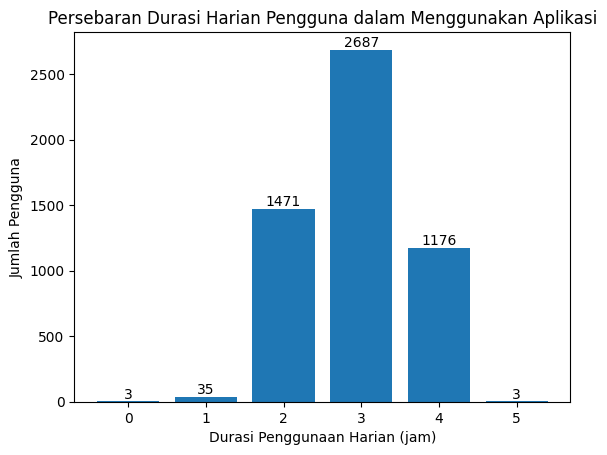

In [6]:
hour_spent_clean = df['HourSpendOnApp'].copy()
hour_spent_clean.dropna(inplace=True)

# Buat daftar untuk menyimpan jumlah user berdasarkan durasi penggunaan (0–5 jam)
hour_distribution = []
duration_range = range(6)  # Jam 0 sampai 5

for hour in duration_range:
    count = hour_spent_clean.loc[hour_spent_clean == hour].count()
    hour_distribution.append(count)

# Visualisasi persebaran durasi penggunaan aplikasi
plt.bar(duration_range, hour_distribution)
plt.xlabel('Durasi Penggunaan Harian (jam)')
plt.ylabel('Jumlah Pengguna')
plt.title('Persebaran Durasi Harian Pengguna dalam Menggunakan Aplikasi')
for i in duration_range:
    plt.text(i, hour_distribution[i], str(hour_distribution[i]), ha='center', va='bottom')
plt.show()


Dari visualisasi barchart di atas terlihat bahwa mayoritas pengguna menghabiskan waktu sekitar 2 hingga 3 jam per hari dalam menggunakan aplikasi. Jumlah pengguna tertinggi pada durasi 3 jam (2.687 pengguna), disusul 2 jam (1.471 pengguna). Sebaliknya, sangat sedikit pengguna yang menghabiskan waktu hanya 1 jam (35 pengguna) maupun lebih dari 4 jam (hanya 3 pengguna pada durasi 5 jam). Hal ini menunjukkan bahwa durasi penggunaan aplikasi secara harian cenderung berada pada rentang sedang, dan hanya sebagian kecil pengguna yang berada di sisi ekstrem durasi pemakaian.

## 4.3 Distribusi jumlah pengguna berdasarkan Tier kota tempat tinggal

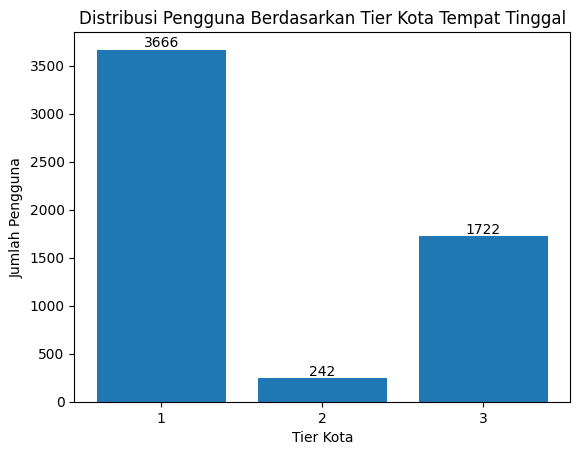

In [14]:
# Hitung jumlah pengguna berdasarkan tier kota tempat tinggal
city_tier_counts = []
city_tiers = [1, 2, 3]

for tier in city_tiers:
    count = df['CityTier'].loc[df['CityTier'] == tier].count()
    city_tier_counts.append(count)

# Visualisasi persebaran pengguna berdasarkan tier kota
plt.bar(city_tiers, city_tier_counts)
plt.xlabel('Tier Kota')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Pengguna Berdasarkan Tier Kota Tempat Tinggal')
plt.xticks(city_tiers)
for i in range(3):
    plt.text(city_tiers[i], city_tier_counts[i], str(city_tier_counts[i]), ha='center', va='bottom')
plt.show()

Berdasarkan visualisasi barchart di atas dapat dilihat bahwa mayoritas pengguna berasal dari kota dengan tier 1 sebanyak 3.666 pengguna, yang menunjukkan bahwa aplikasi ini paling banyak digunakan di kota besar atau metropolitan. Jumlah pengguna dari tier 3 juga cukup tinggi yaitu 1.722 pengguna. Sementara tier 2 memiliki jumlah pengguna paling sedikit yaitu 242 pengguna. Hal ini dapat mengindikasikan bahwa aplikasi lebih populer di daerah perkotaan yang sangat berkembang, sementara penetrasi di kota menengah (tier 2) masih relatif rendah.
Informasi ini sangat penting untuk analisis clustering karena pengguna yang tinggal di tier kota yang sama cenderung memiliki pola perilaku, preferensi, dan kebutuhan yang serupa. Dengan memahami kesamaan ini, perusahaan dapat merancang strategi pemasaran yang lebih efektif seperti menargetkan iklan dan promosi yang disesuaikan dengan karakteristik demografis dan budaya wilayah tersebut

## 4.4 Distribusi jumlah cashback bulanan yang diterima pengguna

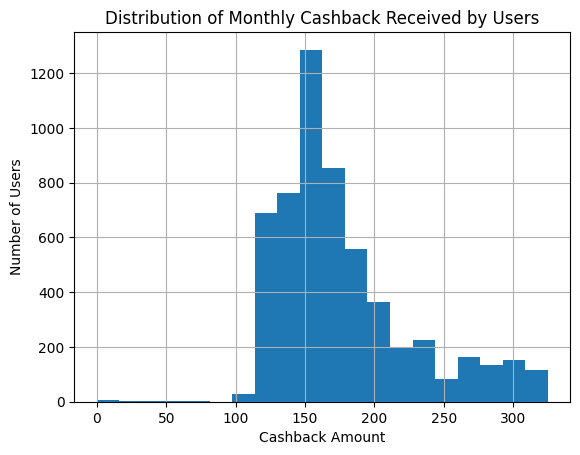

In [15]:
plt.hist(df['CashbackAmount'], bins=20)
plt.xlabel('Cashback Amount')
plt.ylabel('Number of Users')
plt.title('Distribution of Monthly Cashback Received by Users')
plt.grid(True)
plt.show()

Visualisasi di atas menunjukkan bahwa sebagian besar pengguna menerima cashback bulanan dalam rentang 100 hingga 300, dengan puncak tertinggi berada sekitar nilai 150. Hal ini mengindikasikan bahwa nilai cashback rata-rata yang didapatkan pengguna berkisar di angka tersebut. Sementara itu, jumlah pengguna yang tidak menerima cashback (nilai 0) sangat sedikit, hampir tidak terlihat pada distribusi, menandakan sebagian besar pengguna memang mendapatkan cashback secara rutin

## 4.5 Perbandingan Proporsi Pelanggan yang Melakukan Komplain dan Pelanggan yang Melakukan Churn

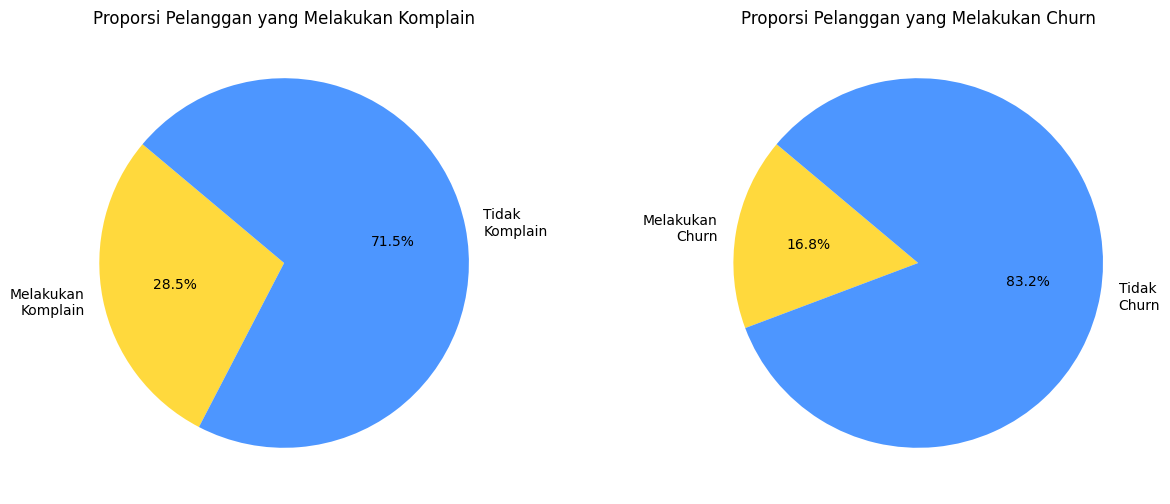

In [16]:
complain_count = df['Complain'].loc[df['Complain'] == 1].count()
no_complain_count = df['Complain'].loc[df['Complain'] == 0].count()
churn_count = df['Churn'].loc[df['Churn'] == 1].count()
no_churn_count = df['Churn'].loc[df['Churn'] == 0].count()

# Gunakan warna yang sama untuk kedua pie chart
shared_colors = ['#FFD93D', '#4D96FF']  # kuning terang & biru cerah

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.pie([complain_count, no_complain_count],
        labels=['Melakukan\nKomplain', 'Tidak\nKomplain'],
        autopct='%1.1f%%',
        startangle=140,
        colors=shared_colors)
plt.title('Proporsi Pelanggan yang Melakukan Komplain')

plt.subplot(1, 2, 2)
plt.pie([churn_count, no_churn_count],
        labels=['Melakukan\nChurn', 'Tidak\nChurn'],
        autopct='%1.1f%%',
        startangle=140,
        colors=shared_colors)
plt.title('Proporsi Pelanggan yang Melakukan Churn')

plt.show()


Berdasarkan pie chart proporsi pelanggan yang melakukan komplain dapat dilihat bahwa mayoritas pelanggan tidak melakukan komplain sebesar 71,5%, sementara 28,5% lainnya menyampaikan keluhan. Hal ini menunjukkan bahwa sebagian besar pelanggan tampaknya cukup puas atau tidak menyuarakan ketidakpuasannya secara langsung.
Sementara itu pie chart untuk perilaku churn, terlihat bahwa 83,2% pelanggan tetap bertahan, sedangkan 16,8% lainnya memutuskan untuk berhenti menggunakan layanan. Meskipun angka churn tidak terlalu tinggi, tetap perlu menjadi perhatian karena mempertahankan pelanggan lama umumnya lebih efisien dibandingkan mencari pelanggan baru.
Jika dilihat dengan seksama, pola user yang melakukan komplain dan pola user yang melakukan churn kelihatan mirip yang dapat diasumsikan bahwa ada korelasinya.

## 4.6 Distribusi durasi penggunaan aplikasi berdasarkan churn

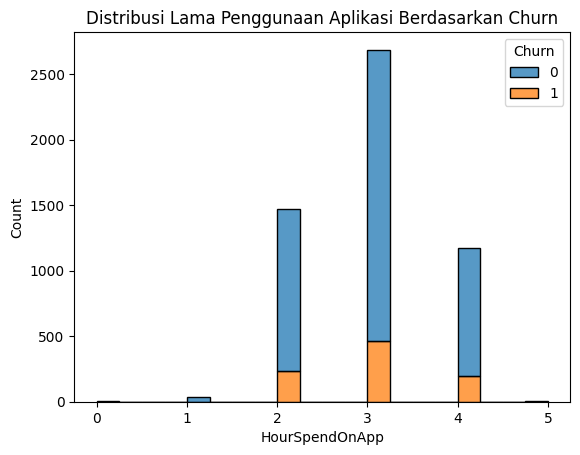

In [17]:
sns.histplot(data=df, x='HourSpendOnApp', hue='Churn', multiple='stack', bins=20)
plt.title('Distribusi Lama Penggunaan Aplikasi Berdasarkan Churn')
plt.show()

Berdasarkan histogram di atas, terlihat bahwa pelanggan yang tidak melakukan churn (churn = 0) mendominasi di seluruh durasi penggunaan aplikasi harian. Puncaknya terdapat pada durasi 3 jam per hari, di mana jumlah pengguna aktif yang tetap setia melebihi 2.500 orang. Hal ini diikuti oleh durasi 2 jam dan 4 jam dengan jumlah pengguna yang juga cukup tinggi. Sebaliknya, pengguna yang melakukan churn (churn = 1) relatif jauh lebih sedikit pada semua tingkat durasi penggunaan. Hal ini mengindikasikan bahwa semakin sering user mengakses aplikasi, semakin kecil kemungkinan mereka untuk berhenti menggunakan layanan.

## 4.7 Distribusi proporsi churn berdasarkan gender

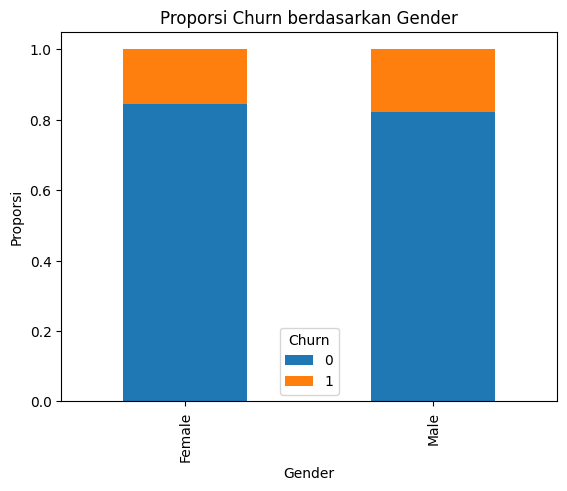

In [18]:
pd.crosstab(df['Gender'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Proporsi Churn berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Proporsi')
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa proporsi pelanggan perempuan (female) yang tidak melakukan churn (churn = 0) lebih tinggi dibandingkan pelanggan laki-laki (male). Artinya perempuan cenderung memiliki tingkat loyalitas yang lebih tinggi terhadap layanan dibandingkan laki-laki. Hal ini dapat menjadi acuan dalam merancang strategi retensi, di mana pendekatan berbeda mungkin diperlukan untuk meningkatkan loyalitas pelanggan laki-laki yang proporsi churn nya relatif lebih tinggi.

# 5. Feature Engineering
## 5.1 Feature Selection
### Define kolom kategorikal dan kolom numerikal

```
Pada bagian ini, dataset dibagi berdasarkan tipe datanya, bukan berdasarkan kategori 'numerik' atau 'kategorikal'.
Hal ini dilakukan karena kolom target 'Churn' bertipe kategorikal dengan nilai 0 dan 1, 
sehingga seluruh analisis korelasi yang dilakukan nantinya akan menggunakan metode Kendall.
Kolom-kolom yang bertipe 'object' dipisahkan karena akan diproses dengan pendekatan berbeda, misalnya dengan encoding.
```

In [7]:
data_object = df.select_dtypes(include='object')  # Memisahkan kolom dengan tipe data objek (kategorikal teks)
data_int_float = df[df.select_dtypes(include=np.number).columns.tolist()]  # Mengambil kolom numerik (int dan float)
data_int_float.drop(['CustomerID'], axis=1, inplace=True)  # Menghapus kolom ID karena tidak diperlukan untuk analisis

### Korelasi data bertipe object

```
Kita akan mengukur hubungan antara kolom target Churn dengan setiap fitur bertipe kategorikal dalam dataset. Pendekatan yang digunakan adalah Kendall Tau, karena tipe data Churn bersifat kategorikal biner, dan fitur-fitur lain juga bersifat kategorikal.
```

In [8]:
hasil_korelasi_kategorikal = []

for fitur_kategorikal in data_object:
    corr_kendall, nilai_p = stats.kendalltau(df['Churn'], df[fitur_kategorikal])
    hasil_korelasi_kategorikal.append((fitur_kategorikal, corr_kendall, nilai_p))

for hasil in hasil_korelasi_kategorikal:
    nama_fitur, corr_kendall, nilai_p = hasil
    print(f"{nama_fitur}:\nKorelasi Kendall: {corr_kendall}\nP-Value: {nilai_p}\n")

PreferredLoginDevice:
Korelasi Kendall: -0.05109907123962243
P-Value: 0.0001261824705431

PreferredPaymentMode:
Korelasi Kendall: 0.0012574063112009532
P-Value: 0.9172510672177588

Gender:
Korelasi Kendall: 0.029263565350544304
P-Value: 0.02812433858502416

PreferedOrderCat:
Korelasi Kendall: 0.12963577117724356
P-Value: 6.059458426207512e-26

MaritalStatus:
Korelasi Kendall: 0.1424865118101859
P-Value: 5.08037790405733e-29



Berdasarkan uji korelasi Kendall di atas, fitur PreferedOrderCat dan MaritalStatus menunjukkan hubungan yang paling signifikan terhadap churn, meskipun kekuatan korelasinya tergolong lemah. Sebaliknya, PreferredPaymentMode tidak memiliki korelasi yang signifikan, sehingga dapat dipertimbangkan untuk dieliminasi. Fitur lain seperti Gender dan PreferredLoginDevice memiliki korelasi yang sangat kecil namun tetap signifikan secara statistik.

### korelasi data bertipe numerik

<Axes: >

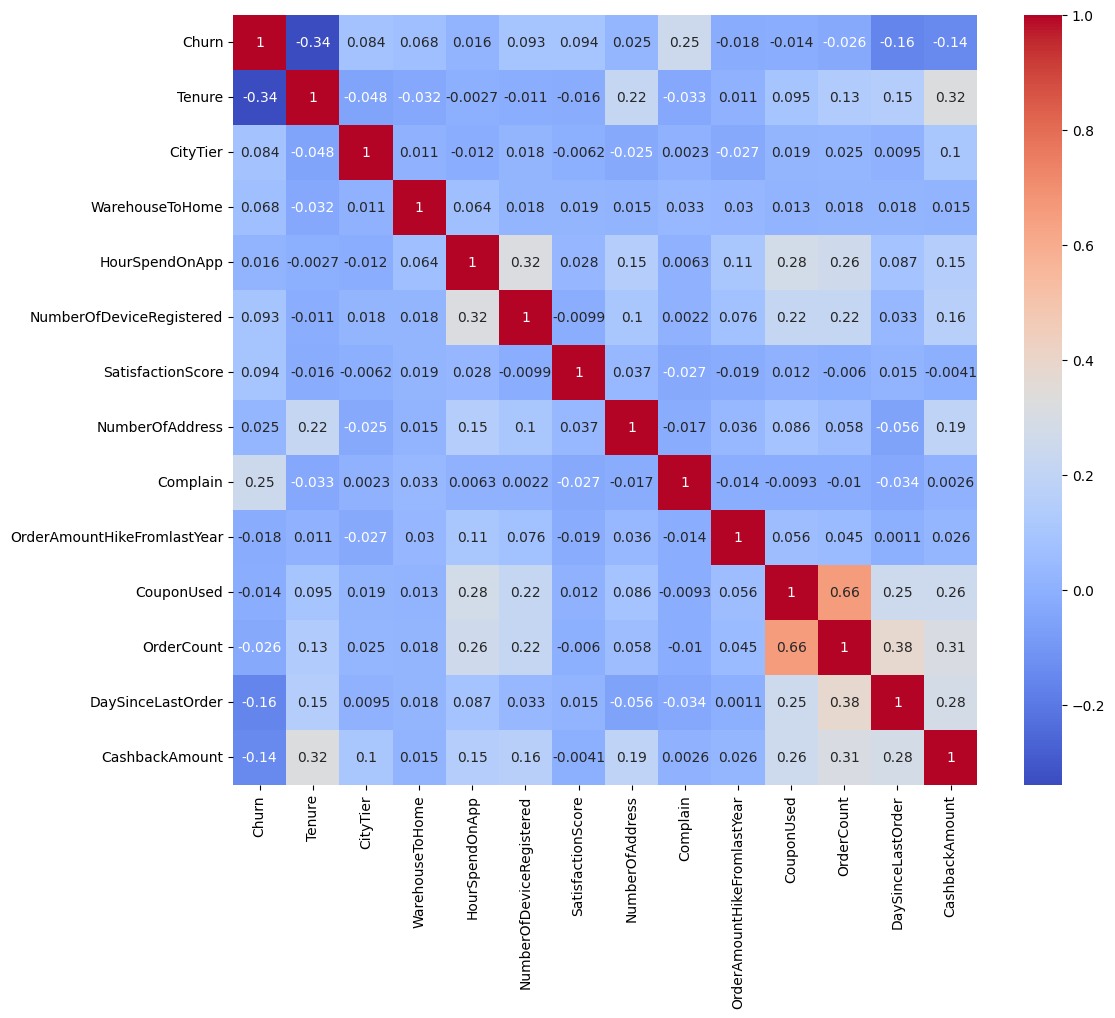

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_int_float.corr(method='kendall'), annot=True, cmap='coolwarm')

Berdasarkan visualisasi heatmap korelasi dengan metode Kendall di atas menunjukkan bahwa hubungan antara beberapa fitur numerik dengan variabel target ```Churn``` cukup terlihat meskipun tidak semuanya menunjukkan korelasi yang kuat. Fitur seperti tingkat kepuasan pelanggan (```SatisfactionScore```) memiliki korelasi negatif terhadap churn, yang mengindikasikan bahwa pelanggan yang lebih puas cenderung untuk tetap bertahan. Sebaliknya, semakin lama waktu sejak terakhir kali melakukan pemesanan (```DaySinceLastOrder```), semakin besar kemungkinan pelanggan untuk berhenti menggunakan layanan, ditunjukkan oleh korelasi positif.

### Menyimpan hasil Feature Selection

```
Fitur yang dipilih merupakan fitur-fitur yang memiliki nilai korelasi Kendall terhadap variabel target (Churn) mendekati atau melebihi 0.1 (10 dalam skala persen). Meskipun tidak semua fitur mencapai tepat 0.1, namun nilai korelasi yang relatif moderat ini dianggap cukup relevan untuk dianalisis lebih lanjut. Selain itu terdapat dua fitury yaitu SatisfactionScore dan NumberOfDeviceRegistered yang memiliki korelasi sedikit di bawah 0.1. Namun karena keduanya dinilai memiliki potensi informasi yang penting secara kontekstual, keduanya tetap disertakan. Sehingga total terdapat 8 fitur terpilih yang akan digunakan untuk tahap pemodelan
```

In [10]:
# membuat salinan data dengan fitur-fitur yg terpilih utk dianalisis lebih lanjut
fitur = df[['Tenure', 'NumberOfDeviceRegistered' ,'SatisfactionScore', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'PreferedOrderCat', 'MaritalStatus', 'Churn']].copy()
fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    5366 non-null   float64
 1   NumberOfDeviceRegistered  5630 non-null   int64  
 2   SatisfactionScore         5630 non-null   int64  
 3   Complain                  5630 non-null   int64  
 4   DaySinceLastOrder         5323 non-null   float64
 5   CashbackAmount            5630 non-null   int64  
 6   PreferedOrderCat          5630 non-null   object 
 7   MaritalStatus             5630 non-null   object 
 8   Churn                     5630 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 396.0+ KB


terlihat dari informasi di atas bahwa dataset hasil seleksi fitur terdiri dari 9 kolom dan 5.630 baris. Terdapat dua kolom dengan missing value yaitu ```Tenure``` dan ```DaySinceLastOrder```, sementara kolom lainnya memiliki data lengkap. Secara tipe data, dataset ini mencakup 2 kolom bertipe float, 5 kolom bertipe integer, dan 2 kolom bertipe object.

## 5.2 Handling Missing Value
### Cek missing value secara keseluruhan dari data

In [23]:
fitur.isna().sum()

Tenure                      264
NumberOfDeviceRegistered      0
SatisfactionScore             0
Complain                      0
DaySinceLastOrder           307
CashbackAmount                0
PreferedOrderCat              0
MaritalStatus                 0
Churn                         0
dtype: int64

Berdasarkan informasi di atas, terlihat bahwa kolom ```Tenure``` dan ```DaySinceLastOrder``` memiliki missing value sehingga perlu dicek lebih lanjut untuk menentukan bagaimana cara menghandlenya

### Handling missing value pada kolom ```Tenure```

In [24]:
# cek nilai unik pada kolom Tenure
fitur['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

```
Ditemukannya nilai 0 pada kolom Tenure membuat penanganan missing value di kolom ini perlu lebih hati-hati. Tidak bisa serta-merta diasumsikan bahwa nilai yang hilang (missing) memiliki arti yang sama dengan nilai 0, karena belum tentu keduanya merepresentasikan kondisi pelanggan yang sama. Oleh karena itu, dilakukan analisis perbandingan antara pelanggan dengan Tenure bernilai 0 dan pelanggan dengan Tenure missing, untuk melihat apakah pola perilaku (khususnya berdasarkan nilai churn) keduanya serupa atau berbeda. Analisis ini penting untuk menentukan apakah aman mengisi nilai yang hilang dengan nol, atau justru perlu pendekatan imputasi yang berbeda

In [25]:
# cek distribusi churn pada data dengan nilai Tenure yang hilang
a = fitur.loc[fitur['Tenure'].isnull()].index
fitur['Churn'].loc[a].value_counts()

Churn
0    183
1     81
Name: count, dtype: int64

In [26]:
# cek distribusi churn pada data dengan nilai Tenure = 0
b = fitur.loc[fitur['Tenure'] ==0.].index
fitur['Churn'].loc[b].value_counts()

Churn
1    272
0    236
Name: count, dtype: int64

Dari hasil pengecekan, pelanggan dengan nilai Tenure yang hilang (missing) sebagian besar tidak churn (183 tidak churn & 81 churn). Sementara itu pelanggan dengan nilai Tenure = 0 memiliki distribusi yang lebih seimbang (272 churn & 236 tidak churn). Hal ini menunjukkan bahwa karakteristik churn pada data yang hilang berbeda dari data dengan nilai nol, sehingga tidak disarankan mengisi missing value dengan nilai 0, karena bisa menimbulkan bias

In [11]:
# mencari modus dari kolom Tenure dan mengecek distribusi churn pada nilai tersebut
modus = fitur['Tenure'].mode()[0]
print('modus', modus)
c = fitur.loc[fitur['Tenure'] ==modus].index
print(fitur['Churn'].loc[c].value_counts())

modus 1.0
Churn
1    349
0    341
Name: count, dtype: int64


Dari pengecekan modusnya, nilai modus pada kolom ```Tenure``` adalah 1.0. Distribusi churn pada nilai ini cukup seimbang, dengan churn = 1 sebanyak 349 dan churn = 0 sebanyak 341. Ini menunjukkan bahwa pengguna dengan masa bergabung singkat (1 bulan) memiliki kemungkinan churn yang hampir sama dengan yang tidak churn. Dalam kondisi seperti ini bisa saja mengisi missing value dengan nilai modus namun karena korelasi antara Tenure dan Churn cukup tinggi, maka saya akan handle missing valuenya dengan menghapus baris yang missing value untuk meminimalkan potensi bias dan menjaga keakuratan representasi data terhadap kondisi sebenarnya

In [12]:
# menghapus baris dengan nilai missing pada kolom Tenure
fitur.dropna(subset=['Tenure'], inplace=True)

### Handling missing value pada kolom ```DaySinceLastOrder```

In [13]:
# cek distribusi churn pada data dengan nilai missing pada kolom DaySinceLastOrder
d = fitur.loc[fitur['DaySinceLastOrder'].isnull()].index
fitur['Churn'].loc[d].value_counts()

Churn
0    253
1     54
Name: count, dtype: int64

In [30]:
fitur['DaySinceLastOrder'].unique()

array([ 5.,  3.,  7.,  2.,  8.,  0.,  6.,  4., 15.,  9., 11.,  1., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

In [31]:
# cek distribusi churn pada data dengan nilai DaySInceLastOrder = 0
e = fitur.loc[fitur['DaySinceLastOrder'] ==0].index
fitur['Churn'].loc[e].value_counts()

Churn
0    274
1    122
Name: count, dtype: int64

Berdasarkan hasil pengecekan, data dengan nilai missing pada kolom ```DaySinceLastOrder``` mayoritas adalah pelanggan yang tidak churn, sedangkan pada data dengan nilai ```DaySinceLastOrder``` = 0, proporsi pelanggan tidak churn juga lebih besar (274 dibanding 122 churn). Namun, terdapat perbedaan cukup signifikan dalam jumlah churn pada nilai 0 yang lebih tinggi dibandingkan dengan data missing. Oleh karena itu, mengisi missing value dengan angka 0 mungkin kurang tepat karena dapat mengubah distribusi asli dan menghasilkan bias. Sehingga perlu dianalisis lebih lanjut dengan metode imputasi lain utk melakukan handling missing value pada fitur ini

In [32]:
# mencari nilai modus pada kolom DaySinceLastOrder
fitur['DaySinceLastOrder'].mode()

0    3.0
Name: DaySinceLastOrder, dtype: float64

In [14]:
modus = fitur['DaySinceLastOrder'].mode()[0]
print('modus', modus)
f = fitur.loc[fitur['DaySinceLastOrder'] ==modus].index
fitur['Churn'].loc[f].value_counts()

modus 3.0


Churn
0    749
1    126
Name: count, dtype: int64

Berdasarkan pengecekan di atas, nilai modus untuk kolom ```DaySinceLastOrder``` adalah 3.0, dengan distribusi churn yang menunjukkan bahwa mayoritas pelanggan dengan nilai ini tidak churn (749 tidak churn & 126 churn). Mengisi nilai yang hilang dengan modus 3.0 dianggap cocok karena nilai ini mewakili kondisi paling umum dalam data dan dapat menjaga distribusi asli fitur tanpa memperkenalkan bias signifikan terhadap churn.

In [15]:
# mengisi nilai missing di kolom DaySinceLastOrder dengan nilai modusnya yaitu 3.0
fitur['DaySinceLastOrder'].replace(np.nan, 3.0, inplace=True)

In [16]:
# cek summary info data
fitur.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5366 entries, 0 to 5629
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    5366 non-null   float64
 1   NumberOfDeviceRegistered  5366 non-null   int64  
 2   SatisfactionScore         5366 non-null   int64  
 3   Complain                  5366 non-null   int64  
 4   DaySinceLastOrder         5366 non-null   float64
 5   CashbackAmount            5366 non-null   int64  
 6   PreferedOrderCat          5366 non-null   object 
 7   MaritalStatus             5366 non-null   object 
 8   Churn                     5366 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 548.3+ KB


In [17]:
# cek missing value
fitur.isna().sum()

Tenure                      0
NumberOfDeviceRegistered    0
SatisfactionScore           0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
PreferedOrderCat            0
MaritalStatus               0
Churn                       0
dtype: int64

Sekarang sudah tidak ada lagi missing value karena sudah kita handle. Maka data ini aman untuk dianalisis lebih lanjut

## 5.3 Cek Cardinality

In [18]:
# membuat looping dari setiap kolom kategorikal utk cek cardinality
unique_list = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain', 'PreferedOrderCat', 'MaritalStatus']
hasil_unique = []
for kolom in unique_list:
    hasil_unique.append([kolom, fitur[kolom].nunique()])

# Membuat DataFrame dari hasil
unique_df = pd.DataFrame(hasil_unique, columns=['Nama Kolom', 'Jumlah Unique Value'])

# Menampilkan DataFrame
unique_df

,Nama Kolom,Jumlah Unique Value
0,NumberOfDeviceRegistered,6
1,SatisfactionScore,5
2,Complain,2
3,PreferedOrderCat,5
4,MaritalStatus,3


Berdasarkan tabel cardinality di atas, seluruh fitur memiliki tingkat cardinality yang tergolong rendah dimana hal ini menunjukkan bahwa data tersebut bersifat kategorikal dan cocok untuk diolah menggunakan teknik encoding. Hal ini juga mengindikasikan bahwa fitur-fitur tersebut tidak memiliki variasi yang berlebihan sehingga tidak berisiko menyebabkan overfitting

## 5.4 Split Data

In [19]:
X = fitur.drop(['Churn'], axis = 1)
y = fitur['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40, stratify = y)

# cek komposisi data
print(f"Shape x_train : {X_train.shape}")
print(f"Shape x_test : {X_test.shape}")

Shape x_train : (4292, 8)
Shape x_test : (1074, 8)


## 5.5 Check Multicollinear/VIF
dilakukan untuk mengukur tingkat multikolinearitas antar variabel independen. Nilai VIF yang tinggi yaitu > 5 menunjukkan bahwa sebuah variable sangat berkorelasi dengan variabel independen lainnya yang dapat menyebabkan ketidakstabilan dalam estimasi koefisien model. Dalam konteks ini, VIF dihitung untuk fitur Tenure, DaySinceLastOrder, dan CashbackAmount dimana hasilnya akan membantu menentukan apakah ada fitur yang perlu dihapus atau diubah karena korelasi tinggi antar variabel.

In [20]:
# Memilih fitur numerik untuk pengecekan multikolinearitas
X = fitur[['Tenure', 'DaySinceLastOrder', 'CashbackAmount']]

# Menambahkan konstanta untuk keperluan perhitungan VIF
X = sm.add_constant(X)

# Menghitung Variance Inflation Factor (VIF) dan menyimpan hasilnya ke dalam DataFrame
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Menampilkan DataFrame VIF
vif_data

,Variable,VIF
0,const,15.135346
1,Tenure,1.295998
2,DaySinceLastOrder,1.095719
3,CashbackAmount,1.374946


Berdasarkan hasil perhitungan VIF di atas, seluruh fitur numerik yaitu Tenure, DaySinceLastOrder, dan CashbackAmount memiliki nilai VIF di bawah 5. Ini menunjukkan bahwa tidak terdapat indikasi multikolinearitas yang signifikan di antara fitur-fitur tersebut. Sehingga semua fitur tersebut layak untuk dipertahankan dalam model karena masing-masing membawa informasi yang unik tanpa saling mempengaruhi secara berlebihan

## 5.6 Check skewness data

In [21]:
# membuat looping utk list fiture numerikal
for i in ['Tenure','DaySinceLastOrder', 'CashbackAmount']:
    skewness = fitur[i].skew()
    print(f"Skewness dari {i} adalah {skewness}")

Skewness dari Tenure adalah 0.7365133838993447
Skewness dari DaySinceLastOrder adalah 1.2644006987210916
Skewness dari CashbackAmount adalah 1.1486438122412665


Berdasarkan hasil perhitungan nilai skewness pada fitur numerik, diketahui bahwa ketiga fitur di atas menunjukkan distribusi yang condong ke kanan (positif). Nilai skewness ```Tenure``` sebesar 0.73 tergolong sedang. Namun pada ```DaySinceLastOrder``` dan ```CashbackAmount```, nilai skewness masing-masing mencapai sekitar 1.26 dan 1.15, yang mengindikasikan tingkat skew distribusi yang lebih tinggi. Kondisi ini dapat memengaruhi performa model sehingga perlu dihandle lebih lanjut

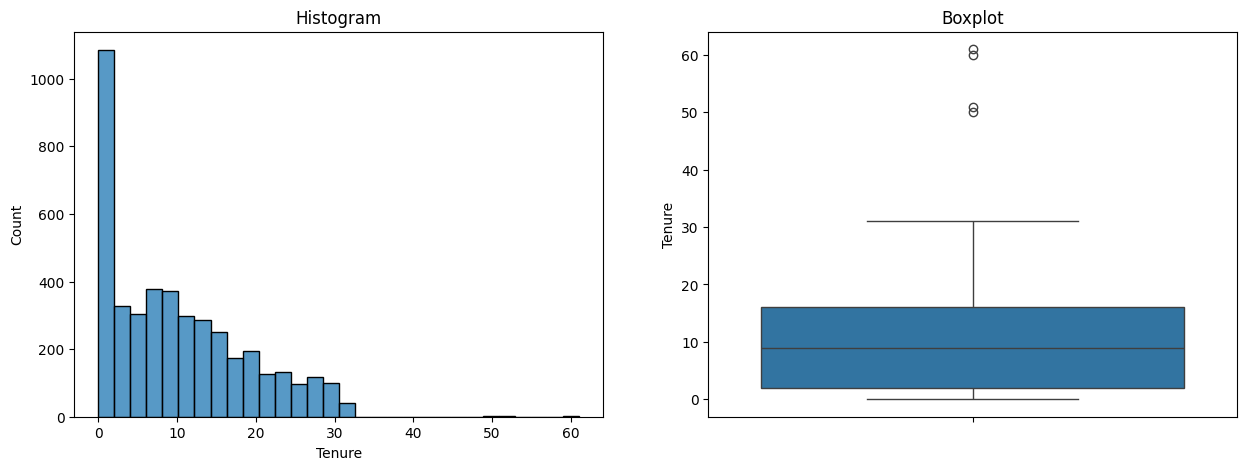

In [22]:
# visualisasi distribusi dan outlier pada Tenure
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['Tenure'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Tenure'])
plt.title('Boxplot')

plt.show()

Terlihat dari hasil visualisasi di atas terdapat outlier. Dimana pada gambar histogram terdapat skewness ke kanan dan pada boxplotnya terdapat outlier

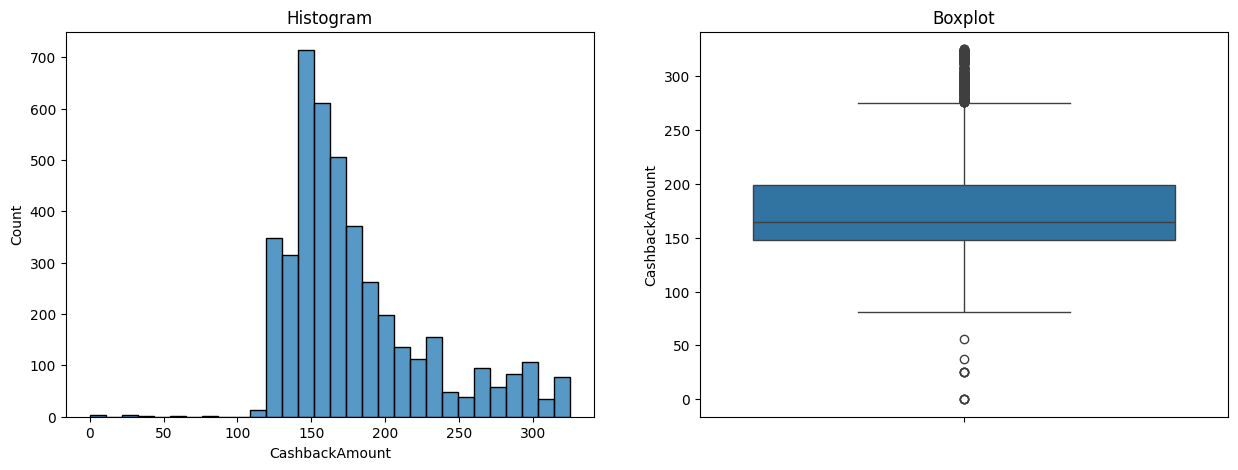

In [42]:
# visualisasi distribusi dan outlier pada CashbackAmount
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['CashbackAmount'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['CashbackAmount'])
plt.title('Boxplot')

plt.show()

Terlihat dari gamabr visualisasi di atas baik histogram maupun boxplot menunjukkan bahwa adanya outlier

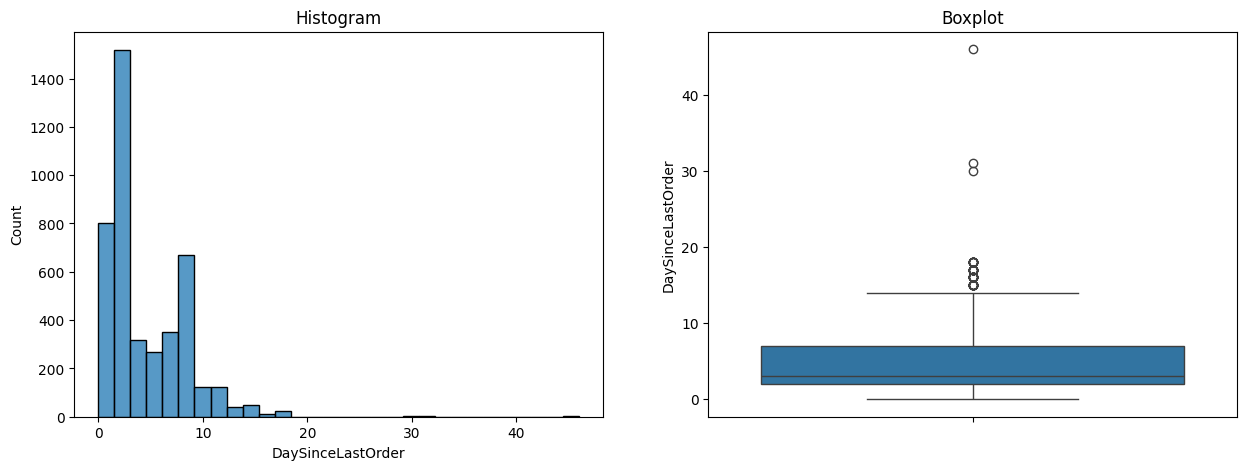

In [43]:
# visualisasi distribusi dan outlier pada DaySinceLastOrder
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['DaySinceLastOrder'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['DaySinceLastOrder'])
plt.title('Boxplot')

plt.show()

Terlihat bahwa dari visualisasi di atas terdapat outlier. Dimana pada histogram menunjukkan skewness kanan dan pada boxplotnya terdapat outlier

## 5.7 Handling outlier
```
Berdasarkan hasil visualisasi dan analisis skewness, ditemukan bahwa beberapa fitur seperti Tenure, DaySinceLastOrder, dan CashbackAmount memiliki distribusi data yang tidak simetris dan mengandung nilai-nilai ekstrem. Untuk mengatasi hal ini, dipilih metode Winsorization dengan pendekatan IQR (Interquartile Range) dan batasan fold sebesar 1.5. Metode ini digunakan karena mampu menyesuaikan nilai-nilai ekstrem tanpa harus menghapus data, sehingga tetap mempertahankan ukuran dataset sekaligus mengurangi potensi bias akibat keberadaan outlier. 
```

In [23]:
# Winsorizer untuk kolom Tenure dengan metode IQR dan fold 1.5
w_tenure = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
X_train['Tenure'] = w_tenure.fit_transform(X_train[['Tenure']])

# Winsorizer untuk kolom DaySinceLastOrder dan CashbackAmount dengan pengaturan sama
w_others = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['DaySinceLastOrder', 'CashbackAmount'])
X_train[['DaySinceLastOrder', 'CashbackAmount']] = w_others.fit_transform(X_train[['DaySinceLastOrder', 'CashbackAmount']])

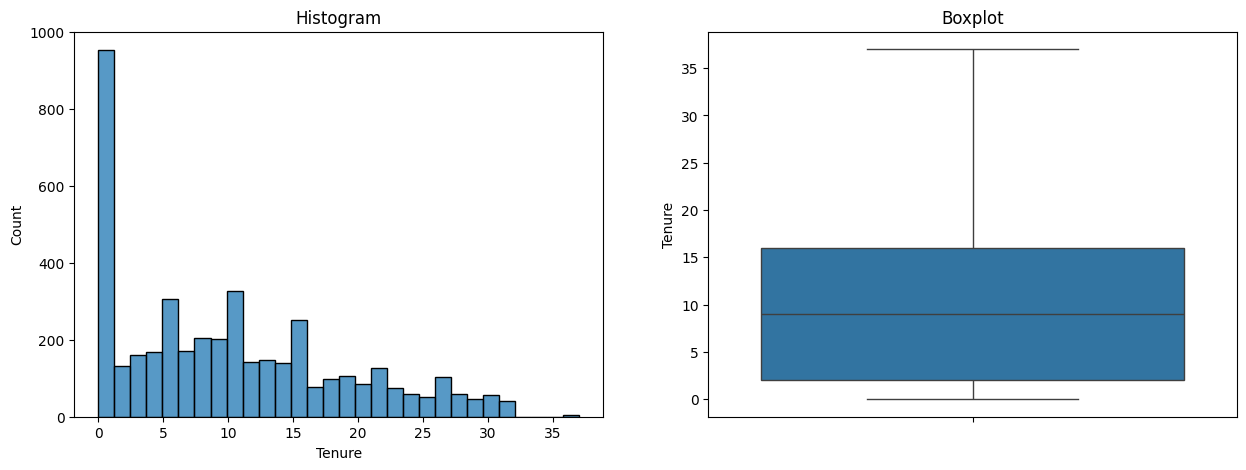

In [24]:
# mengecek distribusi Tenure dgn visualisasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['Tenure'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Tenure'])
plt.title('Boxplot')

plt.show()

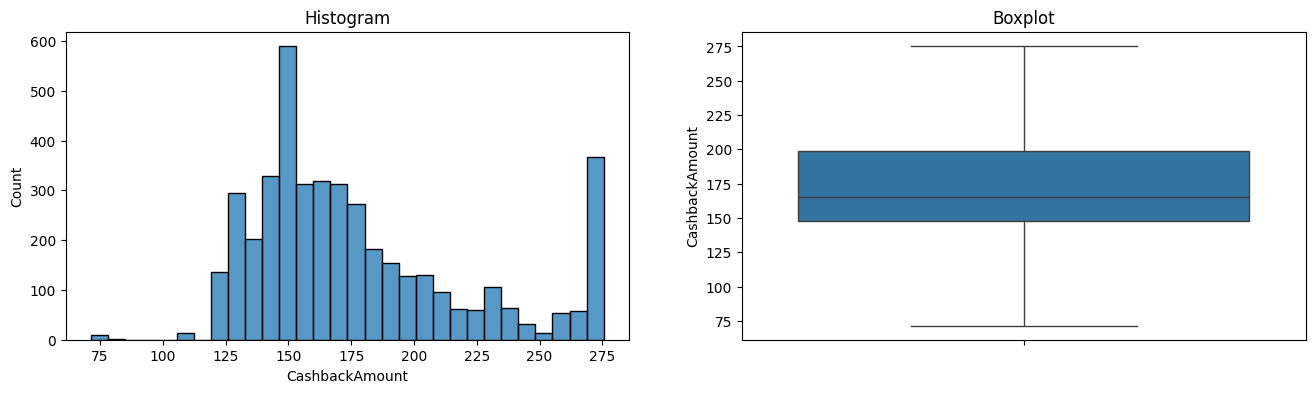

In [25]:
# cek distribusi data CashbackAmount dengan visualisasi
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.histplot(X_train['CashbackAmount'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['CashbackAmount'])
plt.title('Boxplot')

plt.show()

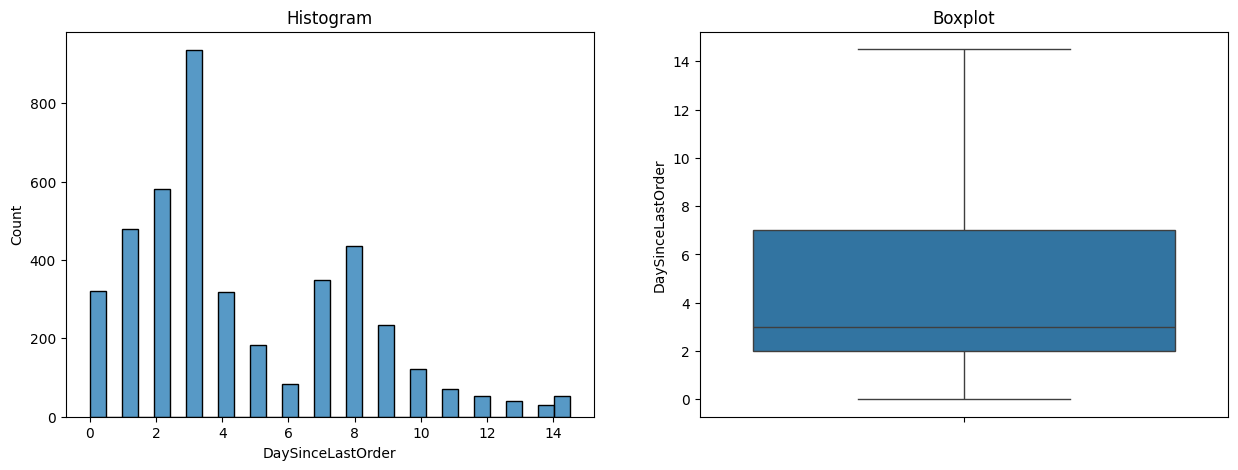

In [26]:
# cek distribusi data DaySinceLastOrder dengan visualisasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(X_train['DaySinceLastOrder'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['DaySinceLastOrder'])
plt.title('Boxplot')

plt.show()

Terlihat pada gambar visualisasi setelah dilakukan handling outlier, tidak terdapat outlier lagi pada fitur-fitur di atas.

## 5.6 Cek Balancing Data

In [27]:
# Menampilkan proporsi data pada target Churn sebelum dilakukan balancing
y_train.value_counts(normalize=True) * 100

Churn
0    83.853681
1    16.146319
Name: proportion, dtype: float64

Terlihat bahwa dari proporsi distribusi datanya imbalance yaitu 83.85 dan 16.14. Kita akan coba melihat visualisasi distribusi datanya agar lebih jelas

Churn
0    0.838427
1    0.161573
Name: proportion, dtype: float64


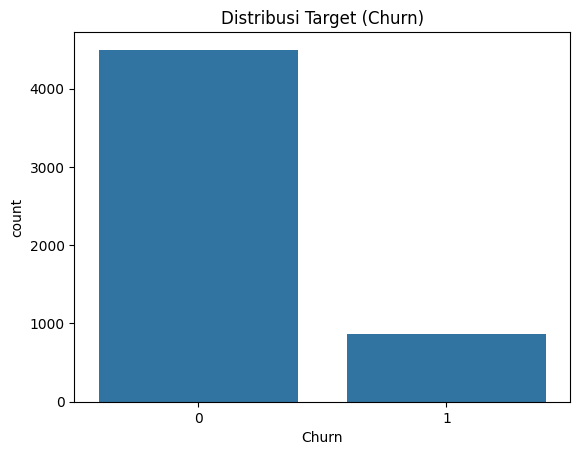

In [28]:
# menampilkan visualisasi distribusi data Churn
print(y.value_counts(normalize=True))
sns.countplot(x=y)
plt.title("Distribusi Target (Churn)")
plt.show()

Terlihat jelas dari visualisasi di atas bahwa data dari target kita yaitu ```Churn``` adalah imbalance. Sehingga kita perlu lakukan balancing dengan oversampling menggunakan SMOTE. Saya menggunakan metode balancing oversampling karena data target mengalami ketidakseimbangan yang signifikan, dengan kelas minoritas (churn = 1) jauh lebih sedikit dibandingkan kelas mayoritas. Oversampling seperti SMOTE membantu menambah jumlah sampel pada kelas minoritas secara sintetis sehingga model dapat belajar lebih baik tanpa kehilangan informasi dari data asli dan mengurangi bias terhadap kelas mayoritas.

# 6. Pipeline: Encoding, Scaling, Modeling, Training and Crossvalidating

```
Pada proses pemodelan ini, dilakukan pra-pemrosesan data dengan membedakan tipe fitur berdasarkan karakteristiknya. Fitur numerik seperti Tenure, DaySinceLastOrder, dan CashbackAmount diolah menggunakan StandardScaler untuk menormalkan skala data sehingga model dapat belajar secara efektif tanpa dipengaruhi oleh skala fitur yang berbeda. Sedangkan fitur kategorikal seperti MaritalStatus dan PreferedOrderCat diterapkan teknik One-Hot Encoding, yang mengubah setiap kategori menjadi representasi biner agar model dapat memahami perbedaan antar kategori secara jelas tanpa asumsi urutan.
Transformasi data dilakukan melalui pipeline yang menggabungkan teknik oversampling SMOTE untuk menangani masalah ketidakseimbangan kelas. Algoritma klasifikasi diuji menggunakan StratifiedKFold cross-validation, yang menjaga proporsi kelas tetap konsisten di setiap fold sehingga hasil evaluasi model menjadi lebih konsisten. 
```

In [29]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
numeric_features = ['Tenure','DaySinceLastOrder', 'CashbackAmount']
numeric_transformer = SklearnPipeline(steps=[("scaler", StandardScaler())])

categorical_features = ["MaritalStatus", "PreferedOrderCat"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

ordinal_features = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain']
ord_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("ord", ord_transformer, ordinal_features)
    ]
)

models = [
    ("Logistic Regression", Pipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", LogisticRegression(max_iter=100000000))
    ])),
    ("K-Nearest Neighbors", Pipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", KNeighborsClassifier())
    ])),
    ("Support Vector Machine", Pipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", SVC())
    ])),
    ("Decision Tree", Pipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", DecisionTreeClassifier())
    ])),
    ("Random Forest", Pipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", RandomForestClassifier())
    ])),
    ("Gradient Boosting", Pipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", GradientBoostingClassifier())
    ]))
]

print("=== Model Evaluation (F1 Score with StratifiedKFold) ===\n")
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1')
    print(f"{name}: {scores}\nMean f1 = {scores.mean():.4f}, Std Dev = {scores.std():.4f}\n")


=== Model Evaluation (F1 Score with StratifiedKFold) ===

Logistic Regression: [0.57286432 0.60154242 0.51105651 0.5253012  0.56019656]
Mean f1 = 0.5542, Std Dev = 0.0326

K-Nearest Neighbors: [0.60686016 0.62049861 0.61878453 0.63212435 0.59130435]
Mean f1 = 0.6139, Std Dev = 0.0139

Support Vector Machine: [0.58947368 0.63270777 0.56763926 0.56396867 0.5994695 ]
Mean f1 = 0.5907, Std Dev = 0.0249

Decision Tree: [0.74385965 0.7440273  0.76534296 0.71672355 0.6975089 ]
Mean f1 = 0.7335, Std Dev = 0.0237

Random Forest: [0.75836431 0.75285171 0.76702509 0.73454545 0.73359073]
Mean f1 = 0.7493, Std Dev = 0.0132

Gradient Boosting: [0.66887417 0.65822785 0.64556962 0.6295082  0.64214047]
Mean f1 = 0.6489, Std Dev = 0.0136



Berdasarkan evaluasi menggunakan Stratified K-Fold Cross Validation dengan metrik F1 Score di atas, Random Forest merupakan model terbaik karena memiliki nilai mean F1 score tertinggi yaitu sekitar 0.7493 dengan variasi (std dev) yang cukup kecil (0.0132). Selain itu, Model ini juga memiliki konsistensi performa yang baik di setiap fold. Oleh karena itu, Random Forest dipilih untuk tahap hyperparameter tuning guna mengoptimalkan kinerja model lebih lanjut.

# 7. Pipeline: Hyperparameter Tuning dengan model Terbaik (Random Forest)

In [30]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300], # jumlah pohon keputusan
    'classifier__max_depth': [10, 20, 30], # kedalaman maksimum pohon
    'classifier__min_samples_split': [2, 5, 10], # minimum sample utk split
    'classifier__min_samples_leaf': [1, 2, 4] # minimum sample di ujung pohon
}

rf_classifier = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf_classifier)
])


grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("\n=== Hyperparameter Terbaik ===")
for param, value in best_params.items():
    print(f"{param}: {value}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits

=== Hyperparameter Terbaik ===
classifier__max_depth: 20
classifier__min_samples_leaf: 1
classifier__min_samples_split: 2
classifier__n_estimators: 200


#### *Kesimpulan*
- Model Terbaik:
    - Model terbaik yang diperoleh dari evaluasi adalah Random Forest, dengan kombinasi hyperparameter terbaik sebagai berikut:
    - n_estimators: 200
    - max_depth: 20
    - min_samples_split: 2
    - min_samples_leaf: 1
- Alasan Pemilihan Model:
    - Random Forest dipilih karena menghasilkan nilai F1-score tertinggi dibanding model lain, yaitu sebesar 0.7493.
    - Model ini juga menunjukkan stabilitas yang baik dengan standar deviasi yang rendah (0.0132), menandakan performa yang konsisten di seluruh fold cross-validation.
- Keunggulan Model Random Forest:
    - Mampu menangani dataset yang kompleks dan memiliki fitur yang saling berinteraksi.
    - Penggunaan 200 pohon keputusan (estimators) memberikan kekuatan prediktif yang tinggi.
    - Kedalaman maksimum 20 memungkinkan model menangkap pola penting tanpa overfitting.
    - Split dan leaf yang optimal memastikan bahwa model tidak terlalu rumit namun tetap akurat.
- Kesimpulan Performa Model:
    - Dengan F1-score yang tinggi dan stabil, model Random Forest sangat cocok untuk digunakan pada tugas klasifikasi ini.
    - Model ini mampu menangani ketidakseimbangan kelas berkat integrasi SMOTE, sehingga hasil prediksi lebih seimbang.
    - Dapat diandalkan untuk pengambilan keputusan lebih lanjut dalam konteks klasifikasi data yang digunakan.

# 8. Model Evaluation
Setelah mendapatkan hyperparameter terbaik dari proses Grid Search pada model Random Forest, langkah berikutnya adalah mengevaluasi performa model tersebut menggunakan data uji yang belum pernah dilihat sebelumnya. Dengan menggunakan model terbaik ini, kita akan melakukan prediksi terhadap data test dan mengukur akurasi sebagai indikator seberapa tepat model dalam mengklasifikasikan data baru.

In [31]:
best_model = grid_search.best_estimator_  # Ambil model terbaik hasil Grid Search
y_pred = best_model.predict(X_test)       # Prediksi label pada data test

accuracy = accuracy_score(y_test, y_pred) # Hitung akurasi prediksi
print(f"Akurasi: {accuracy:.2f}")         # Tampilkan nilai akurasi dengan 2 desimal

print("Laporan Klasifikasi:")              
print(classification_report(y_test, y_pred))  # Tampilkan metrik precision, recall, F1-score

print("Matriks Konfusi:")                  
print(confusion_matrix(y_test, y_pred))    # Tampilkan matriks konfusi hasil prediksi

Akurasi: 0.95
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       900
           1       0.84      0.86      0.85       174

    accuracy                           0.95      1074
   macro avg       0.91      0.91      0.91      1074
weighted avg       0.95      0.95      0.95      1074

Matriks Konfusi:
[[872  28]
 [ 25 149]]


Dari hasil evaluasi model dengan data uji, diperoleh akurasi sebesar 95%, yang menunjukkan bahwa model mampu mengklasifikasikan dengan benar sebagian besar data. Pada laporan klasifikasi, kelas mayoritas (0) memiliki precision dan recall yang sangat baik, masing-masing 97%, sehingga model sangat akurat dalam mengidentifikasi data kelas ini. Sementara itu, kelas minoritas (1) menunjukkan precision 84% dan recall 86%, yang berarti model juga cukup handal dalam mendeteksi kelas ini. Nilai F1-score yang seimbang di kedua kelas memperlihatkan performa model yang stabil serta kesalahan prediksi yang relatif kecil (28 dan 25)

## Compare train and test untuk cek performa model

Confusion Matrix      : 


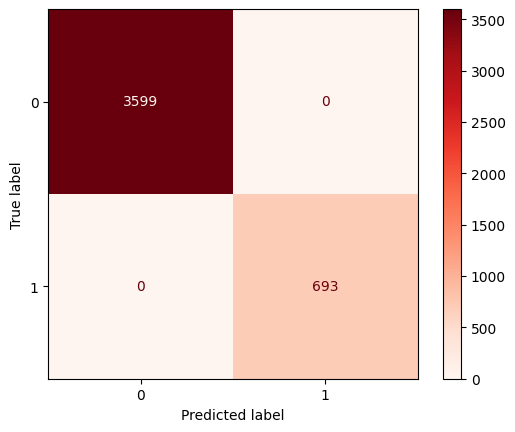

In [35]:
# Menampilkan Confussion Matrix data train
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_model, X_train, y_train, cmap='Reds'))

Confusion Matrix      : 


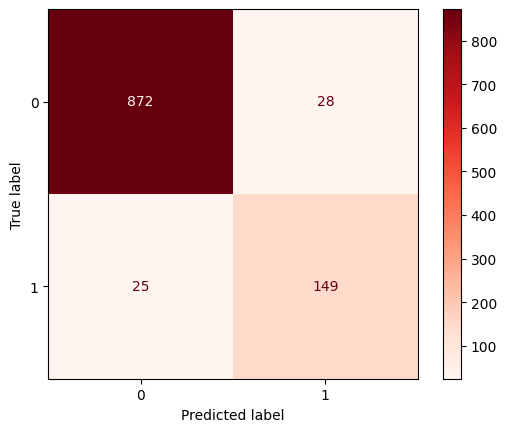

In [36]:
# Menampilkan Confussion Matrix data test
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Reds'))

In [32]:
# Prediksi di train set
y_train_pred = best_model.predict(X_train)

# Prediksi di test set
y_test_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=== Evaluasi di Training Set ===")
print(f"Akurasi train: {accuracy_score(y_train, y_train_pred):.4f}")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\n=== Evaluasi di Test Set ===")
print(f"Akurasi test: {accuracy_score(y_test, y_test_pred):.4f}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

=== Evaluasi di Training Set ===
Akurasi train: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3599
           1       1.00      1.00      1.00       693

    accuracy                           1.00      4292
   macro avg       1.00      1.00      1.00      4292
weighted avg       1.00      1.00      1.00      4292

[[3599    0]
 [   0  693]]

=== Evaluasi di Test Set ===
Akurasi test: 0.9507
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       900
           1       0.84      0.86      0.85       174

    accuracy                           0.95      1074
   macro avg       0.91      0.91      0.91      1074
weighted avg       0.95      0.95      0.95      1074

[[872  28]
 [ 25 149]]


- Kinerja Model:
   - Model menunjukkan akurasi sempurna pada data training (100%), yang berarti seluruh data training berhasil diklasifikasikan dengan benar.
   - Pada data testing, model tetap mempertahankan performa tinggi dengan akurasi mencapai 95,07%. Hal ini menandakan bahwa model mampu mengenali pola dalam data yang belum      pernah dilihat sebelumnya secara cukup efektif.

- Precision, Recall, dan F1-Score:
    - Nilai precision dan recall untuk kelas mayoritas (kelas 0) mencapai 97%, sedangkan untuk kelas minoritas (kelas 1) masing-masing sebesar 84% dan 86%.
    - F1-score untuk kedua kelas juga tinggi, yaitu 0.97 untuk kelas 0 dan 0.85 untuk kelas 1, menunjukkan bahwa model cukup seimbang dalam mendeteksi kedua kelas, meskipun masih ada sedikit gap dalam menangani kelas minoritas.

- Keseimbangan Antara Train dan Test:
    Nilai metrik yang tinggi pada data training dan tetap kuat di data testing menunjukkan bahwa model tidak mengalami penurunan performa yang signifikan, yang biasanya menjadi indikasi awal adanya overfitting.

Insight Tambahan:

Secara keseluruhan, model ini sangat layak digunakan karena mampu memberikan prediksi yang akurat dan seimbang. Namun, penting untuk memahami apakah model ini memiliki kecenderungan overfitting

# 9. Model Saving

In [37]:
# Menyimpan Model
joblib.dump(best_model, 'final_model.pkl')

['final_model.pkl']

# 10. Model Inference
### Jawaban terdapat pada file notebook ```model_inference.ipynb```

# 11. Conclusion

1. Dataset:
    - Dataset terdiri dari 5630 baris dan 20 kolom termasuk kolom target yaitu kolom `Churn`.
    - Terdapat dua kategori pada kolom target yaitu 0 (tidak churn) dan 1 (melakukan churn)
2. Data preprocessing:
   - Dilakukan oversampling untuk menangani ketidakseimbangan data dengan menggunakan SMOTE. Balancing data menggunakan oversampling dilakukan dengan cara penambahan pada kelas minoritas agar jumlah datanya sama dengan jumlah data pada kelas mayoritas. 
   - Melakukan pemilihan kolom feature berdasarkan nilai korelasi dengan target (Churn), dipilih kolom feature `Tenure`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `Complain`, `DaySinceLastOrder`, `CashbackAmount`, `PreferedOrderCat`, dan `MaritalStatus`.
3. Modeling:
    - model klasifikasi yang diuji: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, dan Gradient Boosting
    - model Random Forest dipilih sebagai model terbaik berdasarkan hasil cross-validation dan evaluasi kinerja pada dataset
4. Evaluasi Model:
    - matrix evaluasi yang dipilih adalah precision karena dalamm konteks churn, matriks ini dapat mengukur seberapa akurat model dapat memprediksi kelas minoritas (churn 1) dan mayoritas (churn 0)
    - model terbaik yaitu random forest menunjukkan performa sangat baik dengan akurasi 100% pada data training dan 95% pada data testing. F1-score untuk kedua kelas juga tinggi, yaitu 0.97 untuk kelas 0 dan 0.85 untuk kelas 1
5. Kelebihan dan Kekurangan model Random Forest:
    - Kelebihan: mampu memberikan akurasi yang baik pada data training dan test, sehingga menunjukkan kemampuan generalisasi yang cukup kuat.
    - kekurangan: kurang sensitif terhadap pola minoritas sehingga diperlukan teknik seperti SMOTE
6. Insight terkait EDA:
Berdasarkan hasil visualisasi, mayoritas pengguna lebih memilih mengakses layanan melalui perangkat mobile, khususnya ponsel, yang menandakan pentingnya fokus pada pengoptimalan aplikasi mobile. Durasi penggunaan aplikasi yang umumnya berada di kisaran 2 hingga 3 jam per hari menunjukkan tingkat keterlibatan pengguna yang cukup baik. Pengguna terbanyak berasal dari kota tier 1, sementara penetrasi di kota tier 2 masih rendah, sehingga terdapat peluang untuk memperluas pasar di wilayah menengah tersebut. Program cashback yang diberikan tampak efektif karena sebagian besar pengguna rutin menerima cashback, yang dapat menjadi faktor motivasi utama dalam mempertahankan pelanggan. Meskipun mayoritas pelanggan tidak mengajukan komplain, masih terdapat 16,8% yang melakukan churn, dan pola komplain yang mirip dengan churn mengindikasikan adanya hubungan antara keluhan pelanggan dengan kemungkinan mereka berhenti menggunakan layanan
7. Saran dari segi bisnis terkait EDA yg didapat:
perusahaan sebaiknya memperhatikan penanganan keluhan dengan serius untuk mengurangi churn serta mempertahankan loyalitas pelanggan. Selain itu, fokus pada pengembangan strategi pemasaran yang disesuaikan dengan karakteristik tiap wilayah dapat membantu meningkatkan penetrasi pasar, terutama di kota tier 2. Secara keseluruhan, memperkuat pengalaman pengguna mobile, menjaga kualitas layanan, serta mengelola feedback pelanggan akan menjadi kunci untuk meningkatkan kepuasan dan retensi pelanggan.